<a href="https://colab.research.google.com/github/rahafabumwise/coffee-machine-python/blob/main/notebooks/end_to_end_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01 — Data Ingestion Notebook



In [ ]:
from getpass import getpass
token = getpass("Paste your GitHub token: ")

Paste your GitHub token: ··········


In [ ]:
!git clone https://{token}@github.com/Amal-khairalla/Final-Project1.git


Cloning into 'Final-Project1'...
remote: Enumerating objects: 152, done.
remote: Counting objects: 100% (152/152), done.
remote: Compressing objects: 100% (145/145), done.
remote: Total 152 (delta 79), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (152/152), 1.10 MiB | 9.03 MiB/s, done.
Resolving deltas: 100% (79/79), done.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


##dowload datasets from kaggle

In [2]:
import kagglehub
import os
import pandas as pd
path = kagglehub.dataset_download("psparks/instacart-market-basket-analysis")
files_names = os.listdir(path)
datasets = {}
for file in files_names:
  name = file.removesuffix(".csv")
  datasets[name] = pd.read_csv(f"{path}/{file}")

Using Colab cache for faster access to the 'instacart-market-basket-analysis' dataset.


## Explore the data

In [ ]:
datasets.keys()

dict_keys(['orders', 'order_products__prior', 'departments', 'order_products__train', 'products', 'aisles'])

In [ ]:
for key in datasets.keys():
  print(f"{key}\nshape: {datasets[key].shape}\ncolumns names: {datasets[key].columns}")
  print('-'*30)

orders
shape: (3421083, 7)
columns names: Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order'],
      dtype='object')
------------------------------
order_products__prior
shape: (32434489, 4)
columns names: Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered'], dtype='object')
------------------------------
departments
shape: (21, 2)
columns names: Index(['department_id', 'department'], dtype='object')
------------------------------
order_products__train
shape: (1384617, 4)
columns names: Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered'], dtype='object')
------------------------------
products
shape: (49688, 4)
columns names: Index(['product_id', 'product_name', 'aisle_id', 'department_id'], dtype='object')
------------------------------
aisles
shape: (134, 2)
columns names: Index(['aisle_id', 'aisle'], dtype='object')
------------------------------


In [ ]:
datasets['order_products__train'].head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [ ]:
datasets["orders"].sort_values("order_id").head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
1868044,1,112108,train,4,4,10,9.0
3355525,2,202279,prior,3,5,9,8.0
3417191,3,205970,prior,16,5,17,12.0
2958007,4,178520,prior,36,1,9,7.0
2593373,5,156122,prior,42,6,16,9.0


In [ ]:
datasets['order_products__prior'].head(10)

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
5,2,17794,6,1
6,2,40141,7,1
7,2,1819,8,1
8,2,43668,9,0
9,3,33754,1,1


we only have one column that has missing value(days_since_prior_order in orders dataset)

In [ ]:
for key in datasets.keys():
  print(f"{key} missing values:\n{datasets[key].isnull().sum()}")
  print('-'*30)

orders missing values:
order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64
------------------------------
order_products__prior missing values:
order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64
------------------------------
departments missing values:
department_id    0
department       0
dtype: int64
------------------------------
order_products__train missing values:
order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64
------------------------------
products missing values:
product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64
------------------------------
aisles missing values:
aisle_id    0
aisle       0
dtype: int64
------------------------------


no duplicates in datasets

In [ ]:
for key in datasets.keys():
  print(f"{key} duplicates rows:\n{datasets[key].duplicated().sum()}")
  print('-'*30)

products duplicates rows:
0
------------------------------
order_products__train duplicates rows:
0
------------------------------
orders duplicates rows:
0
------------------------------
order_products__prior duplicates rows:
0
------------------------------
aisles duplicates rows:
0
------------------------------
departments duplicates rows:
0
------------------------------


###Numerical plots

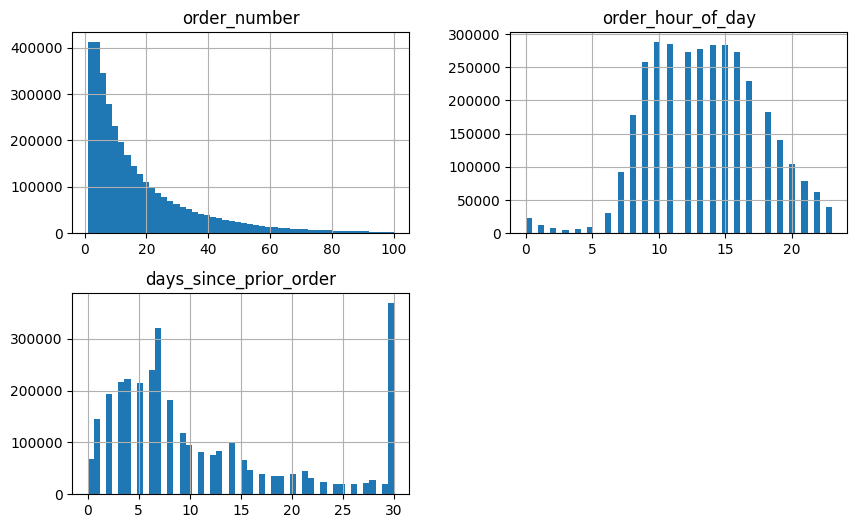

In [ ]:
import matplotlib.pyplot as plt
orders_num_columns = ['order_number','order_hour_of_day', 'days_since_prior_order']
datasets['orders'][orders_num_columns].hist(bins=50, figsize=(10,6))
#datasets['orders'][orders_num_columns].plot(kind='density',subplots=True,figsize=(10, 6))
plt.show()

density plot takes alot of time, so we will take sample of orders to plot faster

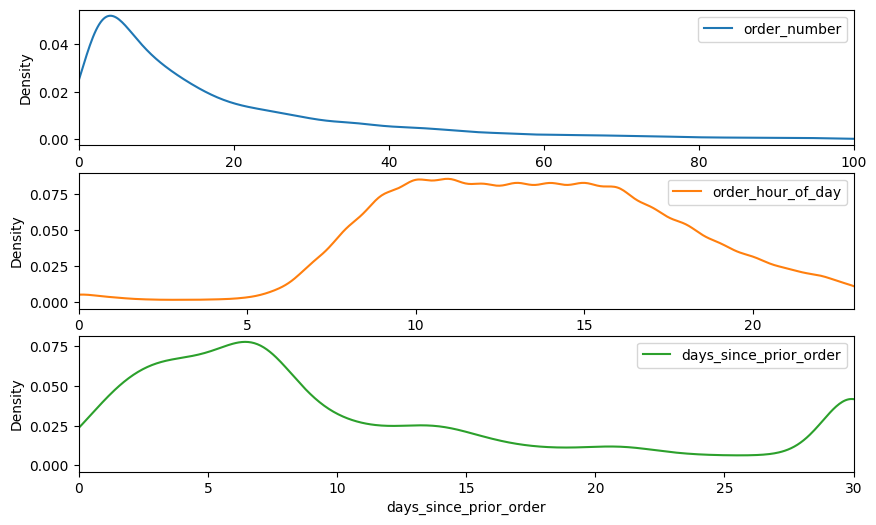

In [ ]:
sample_orders_num = datasets['orders'][orders_num_columns].sample(frac=0.01, random_state= 42)
axes = sample_orders_num.plot(kind='density',subplots=True,figsize=(10, 6), sharex = False)
for ax, column in zip (axes,orders_num_columns) :
  ax.set_xlim(0, max(sample_orders_num[column]))
  ax.set_xlabel(column)
plt.show()

In [ ]:
datasets['order_products__train']['add_to_cart_order'].value_counts().head(10)

,count
add_to_cart_order,
1,131209
2,124364
3,116996
4,108963
5,100745
6,91850
7,83142
8,74601
9,66618


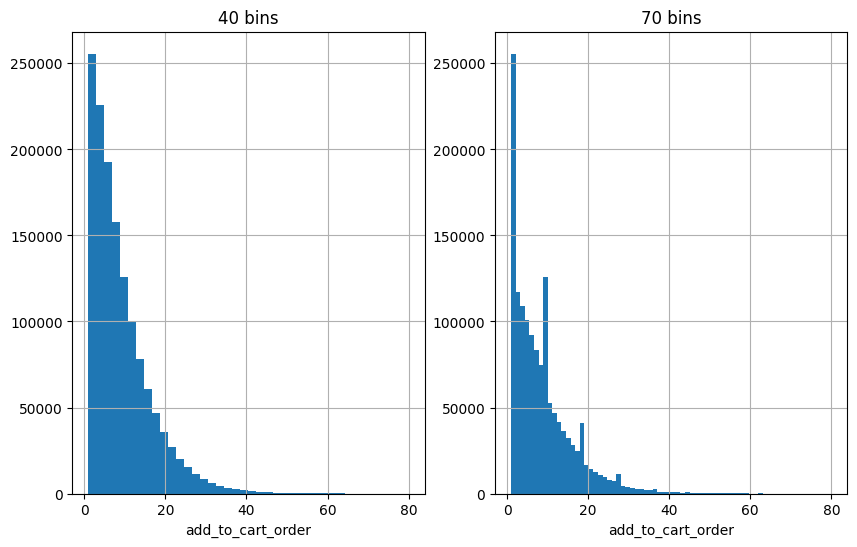

In [ ]:
fig , axes = plt.subplots(1,2, figsize=(12,8))
for ax, bins in zip(axes , [40,70]):
  datasets['order_products__train']['add_to_cart_order'].hist(figsize=(10,6), bins=bins, ax=ax)
  ax.set_title(f"{bins} bins")
  ax.set_xlabel(f"add_to_cart_order")


###cats plots

In [ ]:
orders_cat_columns = ["user_id", "order_dow"]
for column in orders_cat_columns:
  print(datasets['orders'][column].value_counts())


user_id
75124     100
173431    100
127158    100
96192     100
173073    100
         ... 
101710      4
33          4
24824       4
206186      4
44          4
Name: count, Length: 206209, dtype: int64
order_dow
0    600905
1    587478
2    467260
5    453368
6    448761
3    436972
4    426339
Name: count, dtype: int64


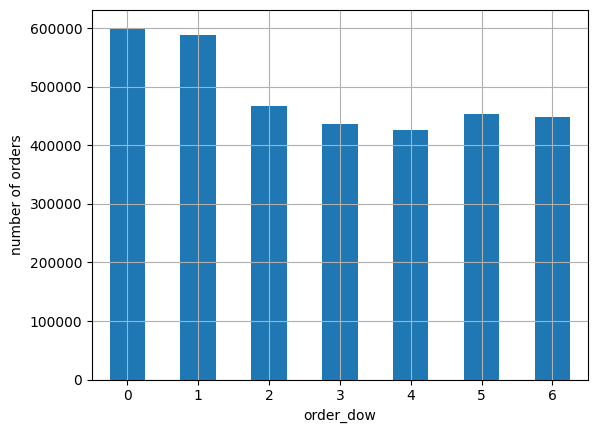

In [ ]:
datasets['orders']["order_dow"].value_counts().sort_index().plot.bar(grid= True, rot=0)
plt.xlabel("order_dow")
plt.ylabel("number of orders")
plt.show()

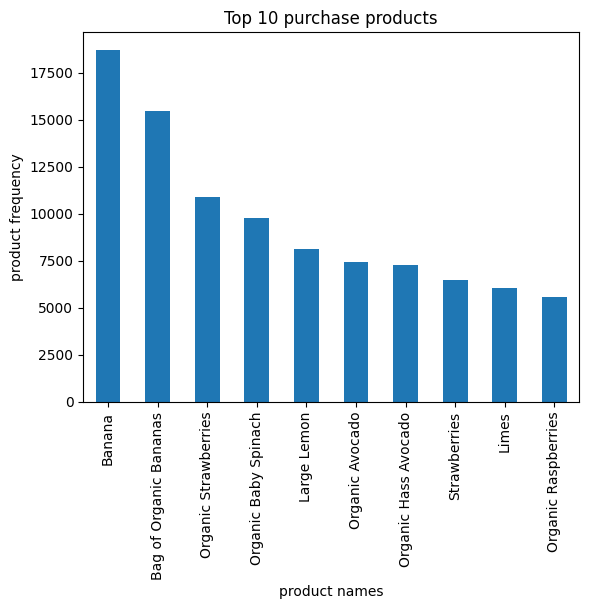

In [ ]:
top_k = 10
top_product = datasets['order_products__train']['product_id'].value_counts().head(top_k)
top_product_names = []
for product_id in top_product.index:
  name = datasets['products'].loc[datasets['products']['product_id']==product_id, "product_name"].values[0]
  top_product_names.append(name)
ax = top_product.plot.bar()
ax.set_xticklabels(top_product_names)
ax.set_xlabel("product names")
ax.set_ylabel("product frequency")
ax.set_title("Top 10 purchase products")
plt.show()

Text(0.5, 1.0, 'Distribution of Add-to-Cart Position')

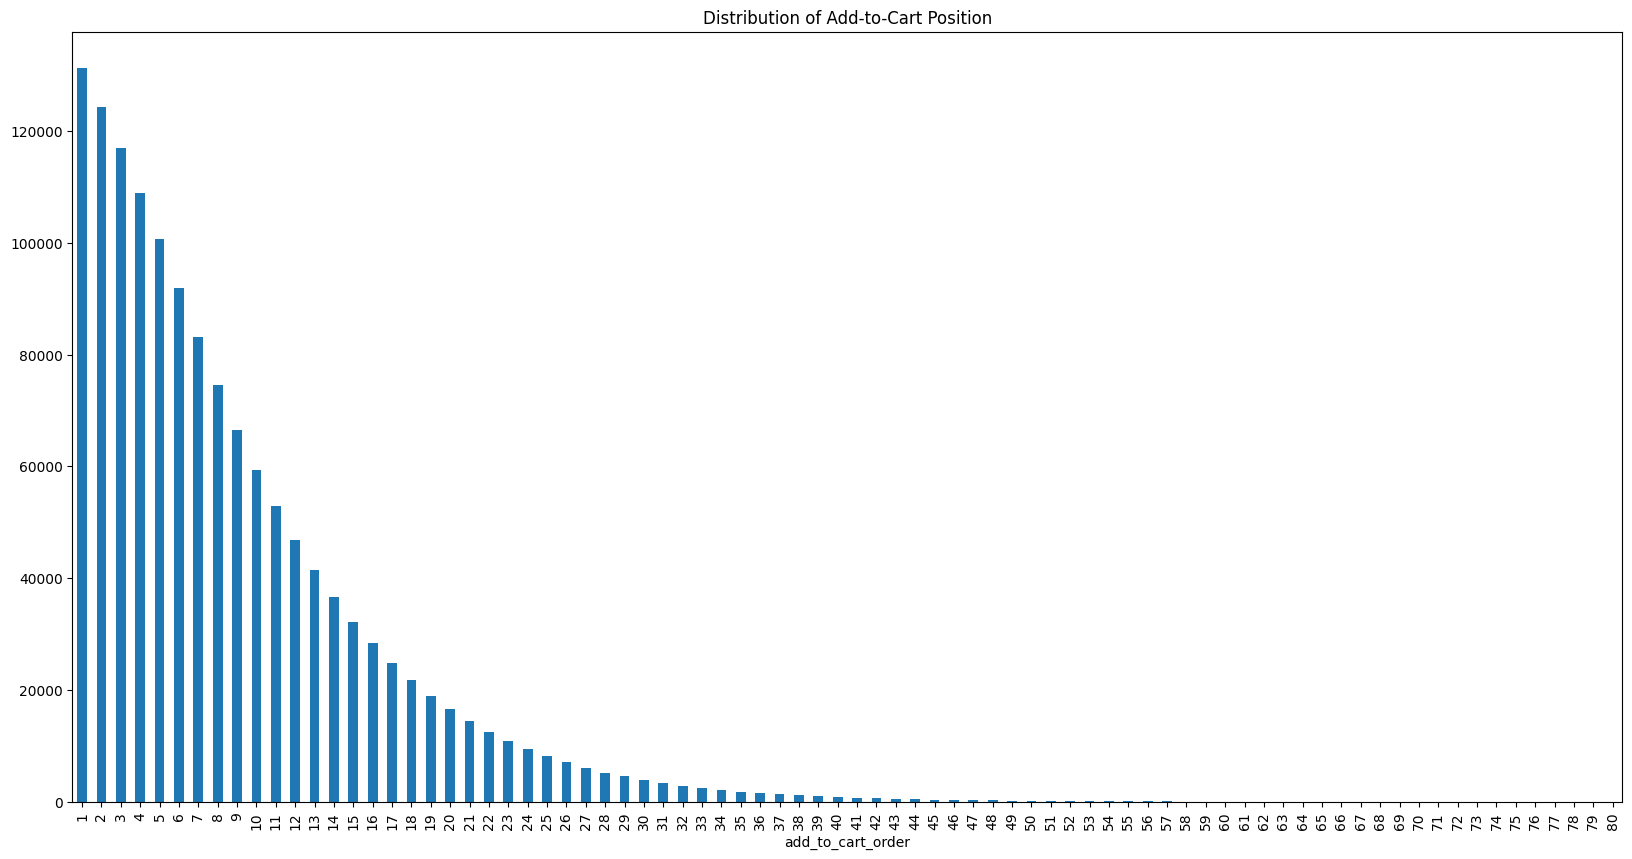

In [ ]:
ax = datasets['order_products__train']['add_to_cart_order'].value_counts().plot.bar(figsize=(20,10))
ax.set_title("Distribution of Add-to-Cart Position")

### Correlation matrix

In [ ]:
order_corr_feature= ['order_number','order_hour_of_day', 'days_since_prior_order',"order_dow"]
datasets['orders'][order_corr_feature].corr()

,order_number,order_hour_of_day,days_since_prior_order,order_dow
order_number,1.000000,-0.035690,-0.360564,0.015258
order_hour_of_day,-0.035690,1.000000,0.001291,0.005978
days_since_prior_order,-0.360564,0.001291,1.000000,-0.028107
order_dow,0.015258,0.005978,-0.028107,1.000000


array([[<Axes: xlabel='order_number', ylabel='order_number'>,
        <Axes: xlabel='order_hour_of_day', ylabel='order_number'>,
        <Axes: xlabel='days_since_prior_order', ylabel='order_number'>,
        <Axes: xlabel='order_dow', ylabel='order_number'>],
       [<Axes: xlabel='order_number', ylabel='order_hour_of_day'>,
        <Axes: xlabel='order_hour_of_day', ylabel='order_hour_of_day'>,
        <Axes: xlabel='days_since_prior_order', ylabel='order_hour_of_day'>,
        <Axes: xlabel='order_dow', ylabel='order_hour_of_day'>],
       [<Axes: xlabel='order_number', ylabel='days_since_prior_order'>,
        <Axes: xlabel='order_hour_of_day', ylabel='days_since_prior_order'>,
        <Axes: xlabel='days_since_prior_order', ylabel='days_since_prior_order'>,
        <Axes: xlabel='order_dow', ylabel='days_since_prior_order'>],
       [<Axes: xlabel='order_number', ylabel='order_dow'>,
        <Axes: xlabel='order_hour_of_day', ylabel='order_dow'>,
        <Axes: xlabel='days_since_

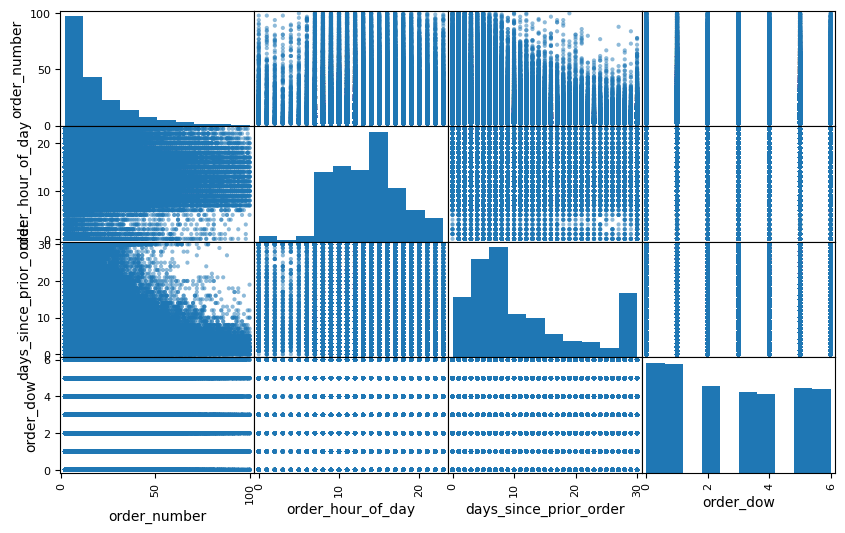

In [ ]:
from pandas.plotting import scatter_matrix
eda_df = datasets['orders'][order_corr_feature].dropna().copy()
scatter_matrix(eda_df.sample(frac = 0.05 , random_state=42), figsize=(10,6))

In [ ]:
datasets['order_products__train'][['add_to_cart_order', 'reordered']].corr()

,add_to_cart_order,reordered
add_to_cart_order,1.000000,-0.146393
reordered,-0.146393,1.000000


array([[<Axes: xlabel='add_to_cart_order', ylabel='add_to_cart_order'>,
        <Axes: xlabel='reordered', ylabel='add_to_cart_order'>],
       [<Axes: xlabel='add_to_cart_order', ylabel='reordered'>,
        <Axes: xlabel='reordered', ylabel='reordered'>]], dtype=object)

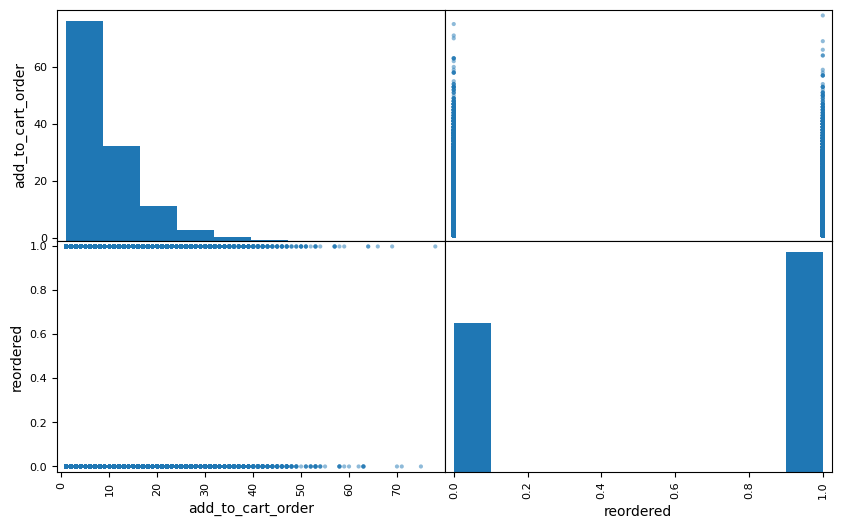

In [ ]:
scatter_matrix(datasets['order_products__train'][['add_to_cart_order', 'reordered']].sample(frac = 0.05 , random_state=42), figsize=(10,6))


In [ ]:
datasets['order_products__train']['add_to_cart_order'].value_counts()

,count
add_to_cart_order,
1,131209
2,124364
3,116996
4,108963
5,100745
...,...
76,5
77,3
78,2


In [ ]:
y = datasets['order_products__train'][['add_to_cart_order','reordered']].value_counts().sort_index().head(20)
y

add_to_cart_order  reordered
1                  0            36392
                   1            94817
2                  0            37448
                   1            86916
3                  0            38846
                   1            78150
4                  0            38471
                   1            70492
5                  0            38001
                   1            62744
6                  0            36280
                   1            55570
7                  0            34194
                   1            48948
8                  0            31381
                   1            43220
9                  0            28875
                   1            37743
10                 0            26049
                   1            33352
Name: count, dtype: int64

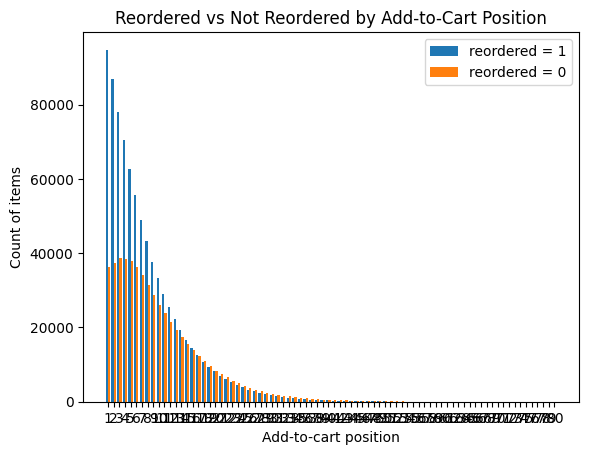

In [ ]:
import numpy as np
cats = datasets['order_products__train']['add_to_cart_order'].unique()
vals1, vals2 = [], []
for cat in cats:
  _reordered1 = datasets['order_products__train'].loc[datasets['order_products__train']['add_to_cart_order']==cat, "reordered"].sum()
  _reordered0 =(datasets['order_products__train']['add_to_cart_order']==cat).sum() - _reordered1
  vals1.append(_reordered1)
  vals2.append(_reordered0)


w, x = 0.4, np.arange(len(cats))

fig, ax = plt.subplots()
ax.bar(x - w/2, vals1, width=w, label='Set 1')
ax.bar(x + w/2, vals2, width=w, label='Set 2')

ax.set_xticks(x)
ax.set_xticklabels(cats)
ax.set_xlabel('Add-to-cart position')
ax.set_ylabel('Count of items')
ax.set_title('Reordered vs Not Reordered by Add-to-Cart Position')
ax.legend(("reordered = 1", "reordered = 0"))

plt.show()

In [ ]:
bins = [0, 5, 10, 15, 20, 25, 30, 40, 50, np.inf]
labels = ['0–5', '5–10', '10–15', '15–20', '20–25', '25–30', '30–40', '40–50', '50+']
df = datasets['order_products__train'][['add_to_cart_order', 'reordered']].copy()
cats = labels
df['cart_bins']= pd.cut(datasets['order_products__train']['add_to_cart_order'], bins, labels)
vals1, vals2 = [], []
for cat in cats:
  _reordered1 = df.loc[df['cart_bins']==cat, "reordered"].sum()
  #_reordered0 =(datasets['order_products__train']['add_to_cart_order']==cat).sum() - _reordered1
  vals1.append(_reordered1)
  #vals2.append(_reordered0)

df['cart_bins'].unique()


SyntaxError: closing parenthesis ']' does not match opening parenthesis '(' (ipython-input-3662318727.py, line 2)

In [ ]:
df['cart_bin']

,cart_bin
0,1–5
1,1–5
2,1–5
3,1–5
4,1–5
...,...
1384612,1–5
1384613,1–5
1384614,1–5
1384615,1–5


#Feature engineering

##user_level_features

In [3]:
orders_prior = datasets['orders'][datasets['orders']["eval_set"] == "prior"]
users_ids = datasets['orders']['user_id'].unique()
user_level_features_df = pd.DataFrame()
user_level_features_df["user_id"] = users_ids
total_orders_df = orders_prior.groupby("user_id")['order_number'].max().reset_index(name="total_orders")
user_level_features_df = user_level_features_df.merge(total_orders_df, on= "user_id", how="left")
basket_size_per_order = datasets['order_products__prior'].groupby("order_id").size().reset_index(name="basket_size")
basket_size_per_order = basket_size_per_order.merge(orders_prior[['user_id',"order_id"]], on = "order_id", how="left")
avg_basket_per_user = basket_size_per_order.groupby("user_id")["basket_size"].mean().reset_index(name="average_basket")
user_level_features_df = user_level_features_df.merge(avg_basket_per_user, on="user_id", how="left")
prior_with_user = datasets["order_products__prior"].merge(orders_prior[['user_id',"order_id"]], on="order_id", how="left")
user_reorder =  prior_with_user.groupby("user_id")["reordered"].agg(total_reorders="sum", total_items="count").reset_index()
user_reorder["reorder_ratio"] = user_reorder["total_reorders"] / user_reorder["total_items"]
user_reorder = user_reorder[["user_id", "reorder_ratio"]]
user_level_features_df = user_level_features_df.merge(user_reorder, on="user_id", how="left")
mean_days_between_order = orders_prior.groupby("user_id")["days_since_prior_order"].mean().reset_index(name="mean_days_between_order")
last_order_recency = orders_prior.sort_values("order_number").groupby("user_id")["days_since_prior_order"].last().reset_index(name="last_order_recency")
user_level_features_df = user_level_features_df.merge(last_order_recency, on="user_id", how="left")

In [4]:
user_level_features_df

,user_id,total_orders,average_basket,reorder_ratio,last_order_recency
0,1,10,5.900000,0.694915,30.0
1,2,14,13.928571,0.476923,13.0
2,3,12,7.333333,0.625000,15.0
3,4,5,3.600000,0.055556,0.0
4,5,4,9.250000,0.378378,19.0
...,...,...,...,...,...
206204,206205,3,10.666667,0.250000,10.0
206205,206206,67,4.253731,0.473684,11.0
206206,206207,16,13.937500,0.587444,18.0
206207,206208,49,13.816327,0.707533,7.0


##Product_level_features

In [5]:
products_ids = datasets["products"]["product_id"].unique()
product_level_features_df = pd.DataFrame()
product_level_features_df["product_id"] = products_ids
orders_df = ( datasets["order_products__prior"].groupby("product_id")["order_id"].count().reset_index(name="orders"))
product_level_features_df = product_level_features_df.merge(orders_df, on= "product_id", how="left")
reorders_df = (
    datasets["order_products__prior"].groupby("product_id")["reordered"].sum().reset_index(name="reorders"))
product_level_features_df = product_level_features_df.merge(reorders_df, on="product_id", how="left")
avg_cart_pos_df = (datasets["order_products__prior"].groupby("product_id")["add_to_cart_order"].mean().reset_index(name="avg_cart_pos"))
product_level_features_df = product_level_features_df.merge(avg_cart_pos_df, on="product_id", how="left")
product_level_features_df["reorder_rate"] = (product_level_features_df["reorders"] / product_level_features_df["orders"])
product_level_features_df[["orders", "reorders"]] = (product_level_features_df[["orders", "reorders"]].fillna(0))
product_level_features_df = product_level_features_df.drop(columns=[ "orders","reorders"])
orders_time = datasets["order_products__prior"].merge(datasets["orders"][["order_id", "order_number"]],on="order_id",how="left")
popularity_time_df = (orders_time.groupby("product_id")["order_number"].mean().reset_index(name="popularity_time"))
product_level_features_df = product_level_features_df.merge(popularity_time_df,on="product_id",how="left")

In [6]:
product_level_features_df

,product_id,avg_cart_pos,reorder_rate,popularity_time
0,1,5.801836,0.613391,19.397408
1,2,9.888889,0.133333,25.666667
2,3,6.415162,0.732852,17.342960
3,4,9.507599,0.446809,9.027356
4,5,6.466667,0.600000,8.933333
...,...,...,...,...
49683,49684,4.333333,0.111111,4.777778
49684,49685,9.571429,0.122449,13.448980
49685,49686,7.500000,0.700000,19.316667
49686,49687,7.538462,0.461538,13.846154


##UserxProduct_features

In [8]:

users_id = orders_prior['user_id'].unique()
products_id = datasets["products"]["product_id"].unique()
user_order_id = orders_prior[['order_id',"user_id" ]]
order_prod_prior_with_user_id = datasets['order_products__prior'].merge(user_order_id, on="order_id", how= "left")
user_product_unique_id = order_prod_prior_with_user_id[['product_id','user_id']].drop_duplicates()
user_product_features_df = pd.DataFrame(user_product_unique_id)
prior_purchase_count = order_prod_prior_with_user_id.groupby(["user_id", "product_id"]).size().reset_index(name="prior_purchase_count" )
user_product_features_df =  user_product_features_df.merge(prior_purchase_count, on=["user_id", "product_id"], how="left")
reorder_prob_userxprod = order_prod_prior_with_user_id.groupby(["user_id", "product_id"])["reordered"].mean().reset_index(name="reorder_prob_userxprod")
user_product_features_df =  user_product_features_df.merge(reorder_prob_userxprod, on=["user_id", "product_id"], how="left")

In [9]:
reorder_prob_userxprod

,user_id,product_id,reorder_prob_userxprod
0,1,196,0.900000
1,1,10258,0.888889
2,1,10326,0.000000
3,1,12427,0.900000
4,1,13032,0.666667
...,...,...,...
13307948,206209,43961,0.666667
13307949,206209,44325,0.000000
13307950,206209,48370,0.000000
13307951,206209,48697,0.000000


In [10]:
train_df = datasets['order_products__train'].merge(datasets['orders'], on="order_id", how="left")

In [12]:
train_df = train_df.merge(product_level_features_df, on="product_id", how="left")
train_df = train_df.merge(user_level_features_df, on="user_id", how="left")
train_df = train_df.merge(reorder_prob_userxprod, on=["product_id","user_id"], how="left")

In [13]:
train_df

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,avg_cart_pos,reorder_rate,popularity_time,total_orders,average_basket,reorder_ratio,last_order_recency,reorder_prob_userxprod
0,1,49302,1,1,112108,train,4,4,10,9.0,6.392638,0.619632,19.625767,3,7.000000,0.428571,15.0,0.500000
1,1,11109,2,1,112108,train,4,4,10,9.0,7.385957,0.713775,18.642665,3,7.000000,0.428571,15.0,0.500000
2,1,10246,3,0,112108,train,4,4,10,9.0,9.608327,0.524553,19.814572,3,7.000000,0.428571,15.0,NaN
3,1,49683,4,0,112108,train,4,4,10,9.0,7.662467,0.691702,14.919529,3,7.000000,0.428571,15.0,NaN
4,1,43633,5,1,112108,train,4,4,10,9.0,9.248086,0.477795,14.926493,3,7.000000,0.428571,15.0,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384612,3421063,14233,3,1,169679,train,30,0,10,4.0,5.008232,0.756538,17.751584,29,11.206897,0.744615,2.0,0.944444
1384613,3421063,35548,4,1,169679,train,30,0,10,4.0,6.880342,0.568376,9.739316,29,11.206897,0.744615,2.0,0.857143
1384614,3421070,35951,1,1,139822,train,15,6,10,8.0,6.629398,0.757837,18.998635,14,2.142857,0.633333,6.0,0.800000
1384615,3421070,16953,2,1,139822,train,15,6,10,8.0,8.417112,0.524285,15.214446,14,2.142857,0.633333,6.0,0.500000


In [17]:
train_df.isnull().sum()

,0
order_id,0
product_id,0
add_to_cart_order,0
reordered,0
user_id,0
eval_set,0
order_number,0
order_dow,0
order_hour_of_day,0
days_since_prior_order,0
